In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as plt
import numpy as np
from sklearn import datasets, linear_model
import csv




In [4]:
df = pd.read_csv("/content/drive/MyDrive/ML/vgsales.csv")

In [5]:
df.shape

(16598, 11)

In [6]:
df.head() #print first 5 dataset

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
df.drop(['Rank','Name','Year','Publisher'],axis=1,inplace=True)
df.head()

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,Sports,41.49,29.02,3.77,8.46,82.74
1,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,Wii,Sports,15.75,11.01,3.28,2.96,33.00
4,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [16]:
dums = pd.get_dummies(df[["Platform","Genre"]])
dums.head()

,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
dums.drop(["Platform_2600","Genre_Misc"],axis=1,inplace=True)

In [18]:
final_df= pd.concat([df,dums],axis=1)
final_df.drop(["Platform","Genre"],axis=1,inplace=True)
final_df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,...,Genre_Adventure,Genre_Fighting,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,29.08,3.58,6.81,0.77,40.24,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11.27,8.89,10.22,1.00,31.37,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 30.471405021832812)

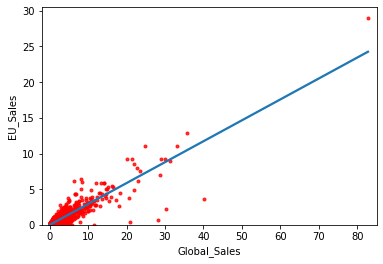

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(final_df.Global_Sales,final_df.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,85)
plt.ylim(bottom=0)

In [21]:
df_outlier = final_df.drop([0],axis=0) 

(0.0, 13.524113383535223)

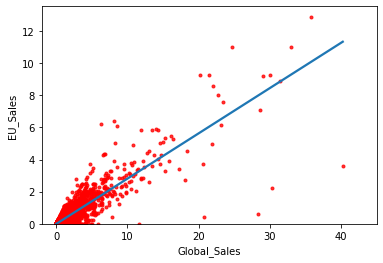

In [22]:
import matplotlib.pyplot as plt
g = sns.regplot(df_outlier.Global_Sales,df_outlier.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,45)
plt.ylim(bottom=0)

In [23]:
x = df_outlier[["EU_Sales"]]
y = df_outlier["Global_Sales"]

In [28]:

from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression()
model = reg.fit(x,y)

In [30]:
model.score(x,y)

0.777825360306871